In [3]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 1.2MB 37.8MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=24f8fc318e9e7430b5c7a08d45767f5e42ee1e0cd4fa0d665e3188dbde7dde24
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=9fe92fc7661f28bbb64f414c213d9fc7ce47d4480c4ec8503d153b9994cd2849
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent
 69% 17.0M/24.5M [00:00<00:00, 26.0MB/s]
100% 24.5M/24.5M [00:00<00:00, 38.7MB/s]
Archive:  human-activity-recognition-with-smartphones.zip
  inflating: test.csv                
  inflating: train.csv               
      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  subject          Activity
0              0.288585

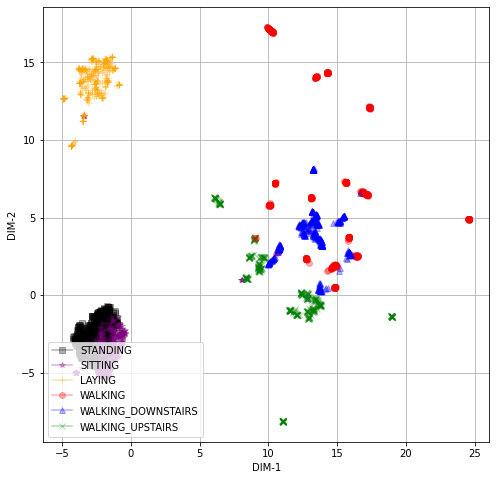

SVMで分類器を学習・評価
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               143872    
_________________________________________________________________
dense_3 (Dense)              (None, 561)               144177    
Total params: 288,049
Trainable params: 288,049
Non-trainable params: 0
_________________________________________________________________
Dim. 256
tf.Tensor(
[[0.         0.5153775  1.7029991  ... 1.2524867  0.         0.8694948 ]
 [0.         1.2263256  1.2409635  ... 1.416954   0.         1.3556213 ]
 [0.         1.6410317  1.7933258  ... 1.5841073  0.         1.0560759 ]
 ...
 [0.         0.27085906 1.0546316  ... 1.2285478  0.         1.1341962 ]
 [0.         0.50528926 1.5078202  ... 1.4305298  0.

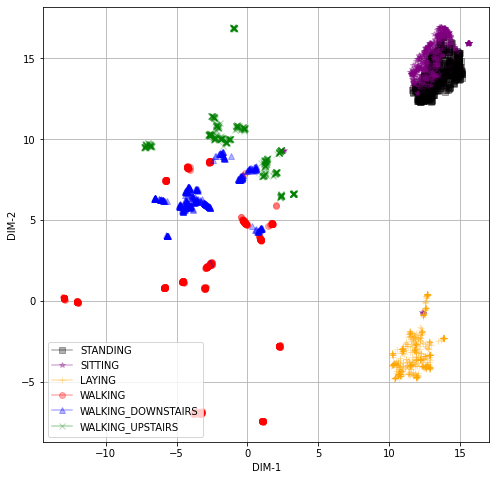

SVMで分類器を学習・評価
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               71936     
_________________________________________________________________
dense_5 (Dense)              (None, 561)               72369     
Total params: 144,305
Trainable params: 144,305
Non-trainable params: 0
_________________________________________________________________
Dim. 128
tf.Tensor(
[[3.0185373  0.         0.62023795 ... 0.         0.7989265  0.        ]
 [3.6749089  0.         1.9416269  ... 0.         1.6543862  0.        ]
 [3.49528    0.         2.6917052  ... 0.         1.7999921  0.        ]
 ...
 [2.3273575  0.         0.         ... 0.         0.6089332  0.        ]
 [2.3862004  0.         0.         ... 0.         1.

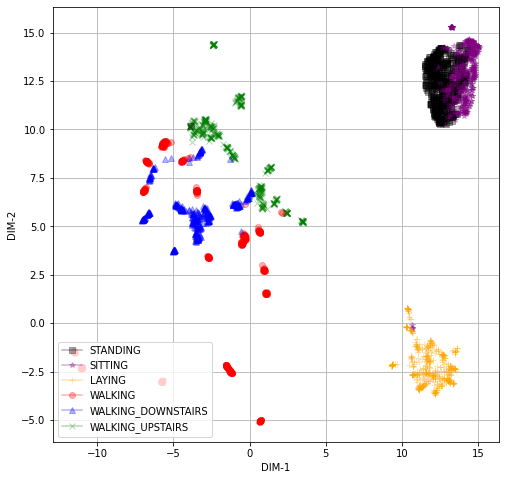

SVMで分類器を学習・評価
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                35968     
_________________________________________________________________
dense_7 (Dense)              (None, 561)               36465     
Total params: 72,433
Trainable params: 72,433
Non-trainable params: 0
_________________________________________________________________
Dim. 64
tf.Tensor(
[[4.2381663 4.465281  3.658265  ... 2.6310005 0.        1.7891397]
 [2.8789325 5.370332  4.884669  ... 3.6793518 0.        3.5376937]
 [2.508278  5.044597  4.8535542 ... 2.9776444 0.        4.040561 ]
 ...
 [6.235251  3.0587316 2.0740871 ... 1.7613146 0.        0.       ]
 [6.3700447 3.7627394 1.4613047 ... 2.4770792 0.        0.       ]
 [6.128467 

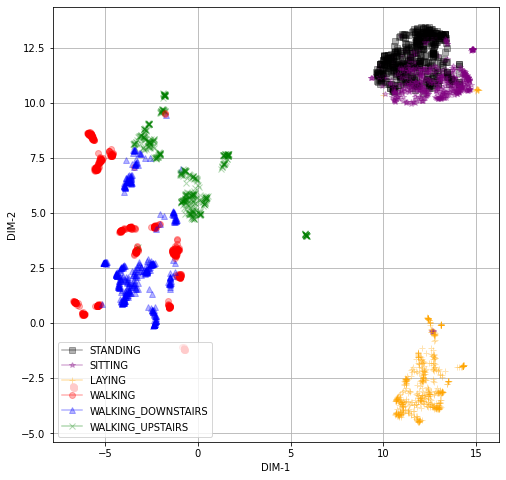

SVMで分類器を学習・評価
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                17984     
_________________________________________________________________
dense_9 (Dense)              (None, 561)               18513     
Total params: 36,497
Trainable params: 36,497
Non-trainable params: 0
_________________________________________________________________
Dim. 32
tf.Tensor(
[[3.699303  0.        0.        ... 5.202492  5.5710816 0.       ]
 [3.9858856 0.        0.        ... 5.6341853 4.3606343 0.       ]
 [4.7677774 0.        0.        ... 4.170461  4.4206305 0.       ]
 ...
 [3.945923  0.        0.        ... 4.5186954 2.3430002 0.       ]
 [4.854926  0.        0.        ... 4.059819  2.3277955 0.       ]
 [4.7677617

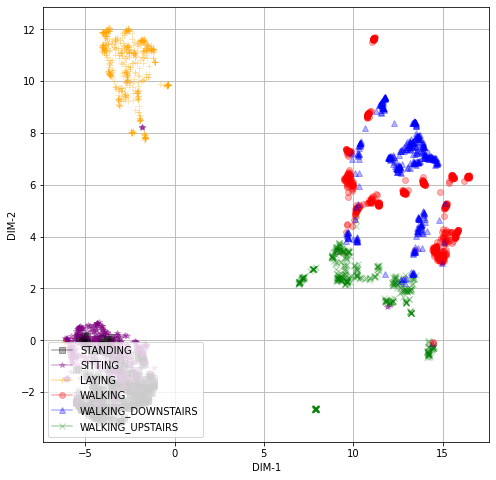

SVMで分類器を学習・評価
Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 561)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                8992      
_________________________________________________________________
dense_11 (Dense)             (None, 561)               9537      
Total params: 18,529
Trainable params: 18,529
Non-trainable params: 0
_________________________________________________________________
Dim. 16
tf.Tensor(
[[0.        5.7578254 8.079471  ... 0.        6.1363344 6.003372 ]
 [0.        6.851458  8.313544  ... 0.        6.473163  6.3461475]
 [0.        5.9082227 8.852069  ... 0.        6.85317   6.5817556]
 ...
 [0.        4.847863  7.53403   ... 0.        4.419457  3.3722856]
 [0.        5.485921  7.697383  ... 0.        5.4510655 4.072624 ]
 [0.       

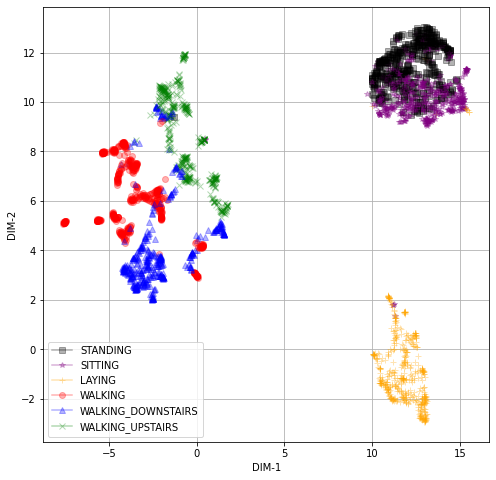

SVMで分類器を学習・評価
Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 561)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 4496      
_________________________________________________________________
dense_13 (Dense)             (None, 561)               5049      
Total params: 9,545
Trainable params: 9,545
Non-trainable params: 0
_________________________________________________________________
Dim. 8
tf.Tensor(
[[ 4.8823514  0.         0.        ... 10.2640915  0.        10.50826  ]
 [ 7.3792686  0.         0.        ... 11.753312   0.        11.581732 ]
 [ 9.320183   0.         0.        ... 12.414966   0.        11.151336 ]
 ...
 [ 0.         0.         0.        ...  5.694051   0.         6.6633615]
 [ 0.         0.         0.        ...  6.28507    0.    

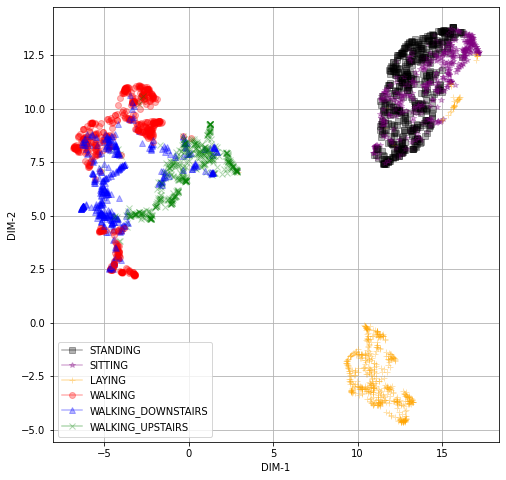

SVMで分類器を学習・評価
Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 561)]             0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 2248      
_________________________________________________________________
dense_15 (Dense)             (None, 561)               2805      
Total params: 5,053
Trainable params: 5,053
Non-trainable params: 0
_________________________________________________________________
Dim. 4
tf.Tensor(
[[ 0.       21.31931   0.        0.      ]
 [ 0.       25.52391   0.        0.      ]
 [ 0.       27.203266  0.        0.      ]
 ...
 [ 0.        7.553657  0.        0.      ]
 [ 0.        8.710801  0.        0.      ]
 [ 0.        8.284219  0.        0.      ]], shape=(2947, 4), dtype=float32)

-----UMAP-----
           1          2
0   6.500309  24.

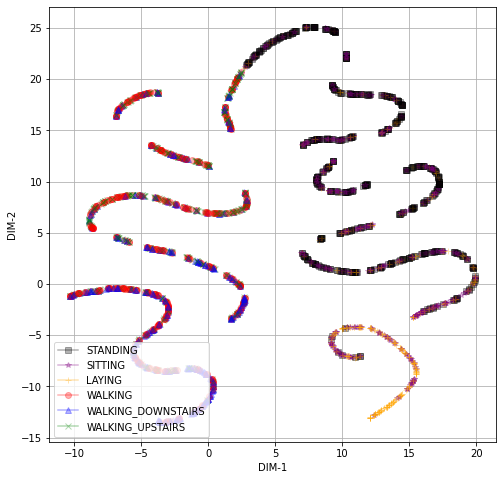

SVMで分類器を学習・評価


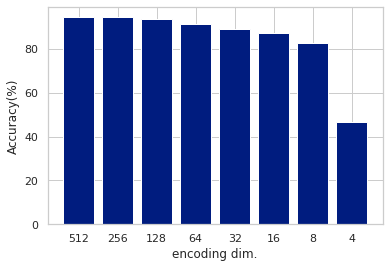

In [8]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import tensorflow.keras as keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
# 可視化用にインポート
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# UMAPのライブラリをインストール
!pip install umap-learn
# UMAPのライブラリをインポート
import umap

def prepare():
    !kaggle datasets download -d \
    uciml/human-activity-recognition-with-smartphones
    !unzip human-activity-recognition-with-smartphones.zip

# 前処理
def preprocess():
    lbh={'WALKING':0, 'WALKING_UPSTAIRS':1, 
          'WALKING_DOWNSTAIRS':2, 'SITTING':3, 
          'STANDING':4, 'LAYING':5}
    trainX, trainY = [], []
    testX, testY = [], []
    for nm in ['train', 'test']:
        df = pd.read_csv('%s.csv' % nm)
        print(df)
        df['Activity'] = df['Activity'].map( lbh )
        df=df.dropna()
        features = []
        for f in df.columns.values:
            if not f in ['subject', 'Activity']:
                features.append(f)
        X = df.loc[:, features].values
        y = df.loc[:, ['Activity']].values.ravel()
        if nm == 'train':
            trainX = X
            trainY = y
        else:
            testX = X
            testY = y
    # 正規化
    sc = MinMaxScaler()
    trainX = sc.fit_transform(trainX)
    testX = sc.transform(testX)
    imp = KNNImputer(n_neighbors=6)
    trainX = imp.fit_transform( trainX )
    testX = imp.transform( testX )
    return trainX, trainY, testX, testY, features

# 自己符号化器の作成
# input_dim: 入力次元数, encoding_dim: 次元削減後の次元数
def make_autoencoder(input_dim, encoding_dim):
    input_data = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim,
                    activation='relu')(input_data)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(input_data, decoded)
    # エンコーダ部分のモデル
    encoder = Model(input_data, encoded)
    # デコーダ部分のモデル
    encoded_input = Input(shape=(encoding_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(encoded_input,
                    decoder_layer(encoded_input))
    # 最適化手法にAdamを用いる
    adam = Adam(lr=0.001)
    autoencoder.compile(optimizer=adam, loss='mse')
    autoencoder.summary()
    get_encoder_layer_output = \
                Model(inputs=[autoencoder.layers[0].input],
                      outputs=[autoencoder.layers[1].output])    
    return autoencoder, get_encoder_layer_output

# UMAPによる次元削減と可視化
def graph_UMAP( hidden_features, labels, encoding_dim):
    print('\n-----UMAP-----')
    # n_components次元に次元削減
    embedding = umap.UMAP(
    n_components=2).fit_transform(
                          hidden_features)
    ndf = pd.DataFrame(embedding, columns=['1', '2'])
    print(ndf.head())
    plt.figure(figsize=(8,8))
    cols=['red', 'green', 'blue', 'purple', 'black', 'orange']
    markers=['o', 'x', '^', '*', 's', '+']
    lbs = ['WALKING', 'WALKING_UPSTAIRS',
          'WALKING_DOWNSTAIRS','SITTING','STANDING', 'LAYING']
    lbc = [0] * len(lbs)
    for (dim1, dim2, label) in zip(
                   embedding[:,0], embedding[:,1], labels):
        if lbc[int(label)] == 0:
            plt.plot(dim1,dim2, color=cols[int(label)],
                alpha=0.3, marker=markers[int(label)], 
                label=lbs[int(label)])
        else:
            plt.plot(dim1,dim2, color=cols[int(label)],
                marker=markers[int(label)], alpha=0.3)
        lbc[int(label)] += 1
    plt.grid()
    plt.xlabel("DIM-1")
    plt.ylabel("DIM-2")
    plt.legend(loc='lower left')
    plt.savefig('AE-umap-{}.png'.format(encoding_dim))
    plt.show()
    return lbs

# グラフで精度を表示
def makeResultGraph(encoding_dims, accuracies):
    sns.set()
    sns.set_style('whitegrid')
    sns.set_palette('dark')
    x = np.array(encoding_dims)
    y = np.array(accuracies)
    x_position = np.arange(len(x))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(x_position, y, tick_label=x)
    ax.set_xlabel('encoding dim.')
    ax.set_ylabel('Accuracy(%)')
    fig.savefig('AE-SVM-result.png', dpi=400)
    fig.show()

def main():
    prepare()
    x_train, y_train, x_test, y_test, features = preprocess()
    input_dim = len(features)
    accuracies = []
    encoding_dims = [512, 256, 128, 64, 32, 16, 8, 4]
    for encoding_dim in encoding_dims:
        autoencoder, get_encoder_layer_output = \
              make_autoencoder(input_dim, encoding_dim)
        x_train = x_train.reshape(\
              (len(x_train), np.prod(x_train.shape[1:])))
        x_test = x_test.reshape(\
              (len(x_test), np.prod(x_test.shape[1:])))
        # 学習の実行(epoch数は300, バッチサイズは512)
        history = autoencoder.fit(x_train, x_train,
                                epochs=300,
                                batch_size=512,
                                shuffle=True,
                       verbose=0,validation_split=0.2)
        # 中間層の出力をテストデータに対して得る
        layer_output = get_encoder_layer_output(x_test)
        print('Dim. %d' %len(layer_output[0]))
        print(layer_output)                 
        # UMAPで encoding_dim -> 2次元に変換
        lbs = graph_UMAP(layer_output, y_test, encoding_dim)
        # SVMで分類
        print('SVMで分類器を学習・評価')
        # 学習データも自己符号化器により次元削減する
        train_output = get_encoder_layer_output(x_train)
        svm = SVC()
        svm.fit(train_output, y_train)
        y_pred = svm.predict(layer_output)
        clr = classification_report(
            y_test, y_pred, 
            target_names=lbs, output_dict=True)
        accuracies.append(clr['accuracy'] * 100)
    # 各次元の精度(Accuracy)をグラフで示す
    makeResultGraph(encoding_dims, accuracies)

if __name__ == '__main__':
    main()
    